In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import ternary

print('Numpy version:', np.__version__)
print('Pandas version:',pd.__version__)
print('Matplotlib version:', matplotlib.__version__)
print("Ternary version:",ternary.__version__)

Numpy version: 1.18.2
Pandas version: 0.25.3
Matplotlib version: 3.1.3
Ternary version: 1.0.6


## ternary data

### base

In [2]:
enzyme_base = pd.read_csv('Enzyme_base_dis_20201.csv',index_col=0)
osmolyte_base = pd.read_csv('Osmolyte_base_dis_20201.csv',index_col=0)
yield_base = pd.read_csv('Yield_base_dis_20201.csv',index_col=0)
yield_base[yield_base < 0] = 0

### basex10

In [3]:
enzyme_basex10 = pd.read_csv('Enzyme_basex10_dis_20201.csv',index_col=0)
osmolyte_basex10 = pd.read_csv('Osmolyte_basex10_dis_20201.csv',index_col=0)
yield_basex10 = pd.read_csv('Yield_basex10_dis_20201.csv',index_col=0)
yield_basex10[yield_basex10 < 0] = 0

In [4]:
base    = pd.read_csv('forcing/base_forcing.csv', index_col=0)
basex10 = pd.read_csv('forcing/basex10_forcing.csv', index_col=0)

In [5]:
def community_data(enzyme,osmolyte,Yield):
    """
    Derive community level YAS data.
    
    Parameters:
      enzyme
      osmolyte
      Yield
    Return:
      community_alive:
    """
    community = pd.concat([enzyme.sum(axis=0),osmolyte.sum(axis=0),Yield.sum(axis=0)],axis=1,sort=False)
    community.columns = ['Enzyme','Osmolyte', 'Yield']
    total = community.sum(axis=1)
    community_alive = 100*community[total>0].divide(total[total>0],axis=0)
    
    return community_alive

## default order

In [6]:
community_base    = community_data(enzyme_base,   osmolyte_base,   yield_base)
community_basex10 = community_data(enzyme_basex10,osmolyte_basex10,yield_basex10)

## YAS order

In [11]:
community_base    = community_data(osmolyte_base, yield_base, enzyme_base)
community_basex10 = community_data(osmolyte_basex10, yield_basex10, enzyme_basex10)

## year-3

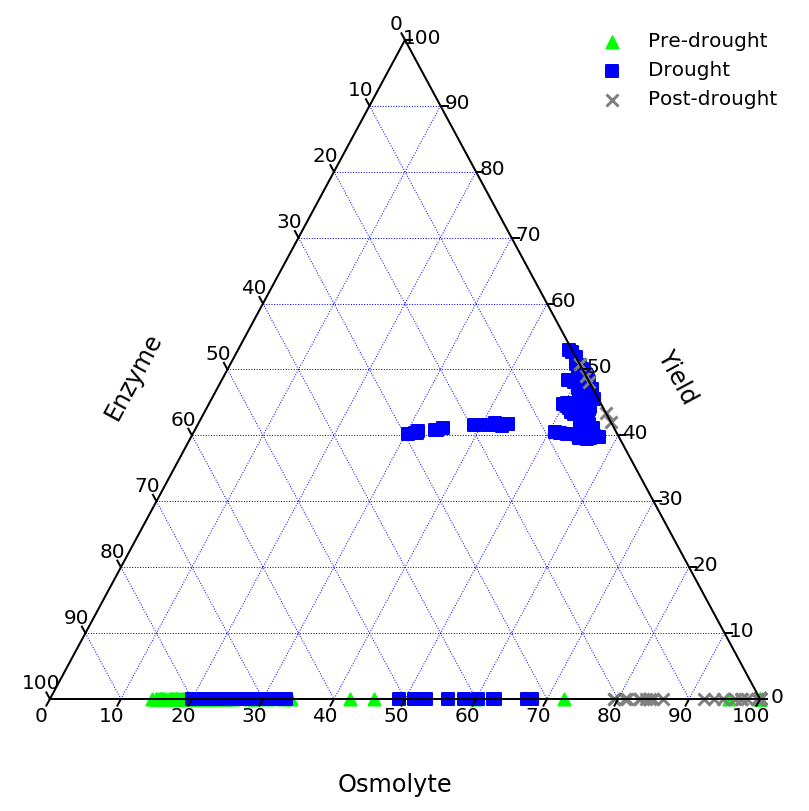

In [7]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,7)

#tax.scatter(community_base.iloc[365*3-365:365*3-0,:].values,   marker='s',color='blue',   label="Base",alpha=1.0)
tax.scatter(community_base.iloc[365*3-365:365*3-257,:].values,marker='^',color='lime',label="Pre-drought", alpha=1.0)
tax.scatter(community_base.iloc[365*3-257:365*3-75,:].values, marker='s',color='blue',label="Drought",     alpha=1.0)
tax.scatter(community_base.iloc[365*3-75:365*3-0,:].values,   marker='x',color='grey',label="Post-drought",alpha=1.0)


#tax.scatter(community_basex4.iloc[365*3-365:365*3-0,:].values, marker='s',color='orange', label="Base",alpha=1.0)
#tax.scatter(community_basex10.iloc[365*3-365:365*3-0,:].values,marker='s',color='red',    label="Base",alpha=0.5)

tax.legend(frameon=False)

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =12
tax.left_axis_label("Enzyme",     fontsize=fontsize, offset=0.14)
tax.right_axis_label("Yield",     fontsize=fontsize, offset=0.14)
tax.bottom_axis_label("Osmolyte", fontsize=fontsize, offset=0.05)

tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()

## year-6

In [12]:
community_base_y6    = community_base.iloc[365*6-257:365*6-75,:]
community_basex10_y6 = community_basex10.iloc[365*6-257:365*6-75,:]

community_base_y6    = community_base_y6.loc[community_base_y6['Yield']> 0]
community_basex10_y6 = community_basex10_y6.loc[community_basex10_y6['Yield']> 0]

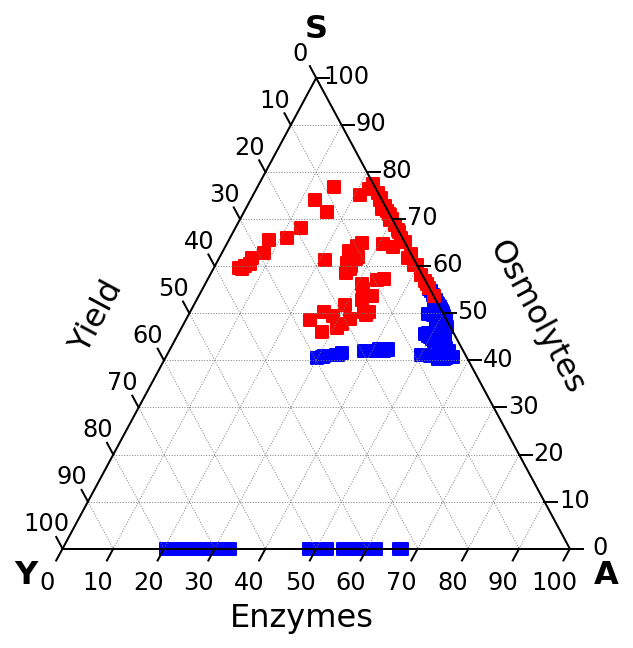

In [9]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)


tax.scatter(community_base_y6.values, marker='s',color='blue', label="Ambient",alpha=1.0)
tax.scatter(community_basex10_y6.values,marker='s',color='red',    label="Severe",alpha=1.0)

#tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)

tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Yield",    fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Osmolytes",fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Enzymes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("A",fontsize=fontsize,weight='heavy')
tax.top_corner_label("S",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("Y", fontsize=fontsize,weight='heavy')

#tax.savefig('../figures/ternary_dis_y6.pdf',dpi=500)

tax.show()

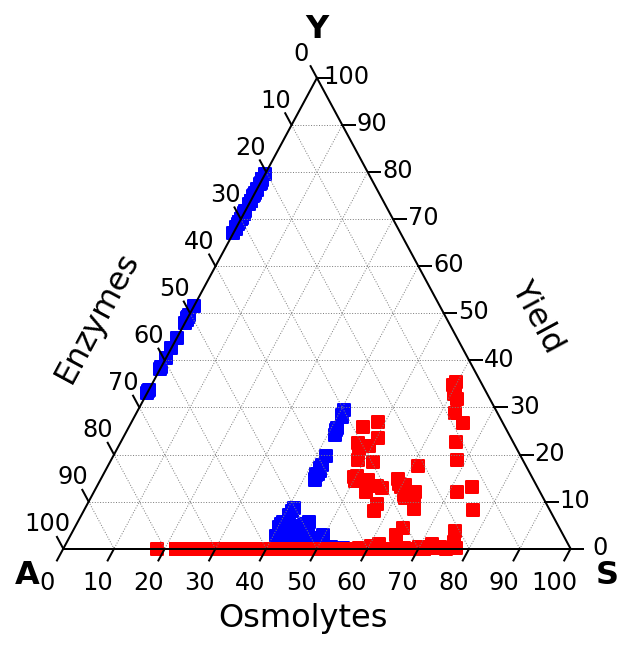

In [15]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)

tax.scatter(community_base_y6.values, marker='s',color='blue', label="Ambient",alpha=1.0)
tax.scatter(community_basex10_y6.values,marker='s',color='red',label="Severe",alpha=1.0)

#tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)

tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",     fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Yield",      fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

#tax.savefig('../figures/ternary_dis_y6.pdf',dpi=500)

tax.show()

In [16]:
community_base_dis_t = community_base.iloc[365*6-257:365*6-75,:].copy()
community_base_dis_t['Psi'] = abs(base.iloc[365*6-257:365*6-75,:].loc[:,'Psi']).tolist()

community_basex10_dis_t = community_basex10.iloc[365*6-257:365*6-75,:].copy()
community_basex10_dis_t['Psi'] = abs(basex10.iloc[365*6-257:365*6-75,:].loc[:,'Psi']).tolist()

community_year6 = pd.concat([community_base_dis_t, community_basex10_dis_t])

community_year6 = community_year6[community_year6['Yield'] > 0]

community_y6 = dict()
for (i, j, y, p) in community_year6.values:
    community_y6[(i, j)] = p

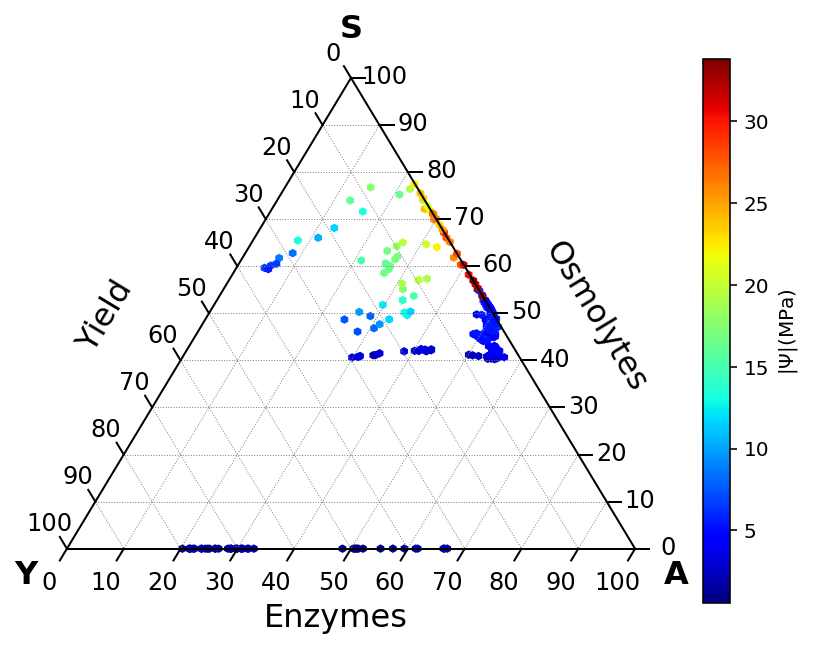

In [11]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,5)


tax.heatmap(community_y6, style="hexagonal", cmap='jet',colorbar=True,cbarlabel='|$\Psi$|(MPa)')
#tax.get_colorbar(orientation='vertical')
#cbar.set_label('Cellulose (mg C cm$^-$$^3$)',size=14)

#tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)

tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Yield",    fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Osmolytes",fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Enzymes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("A",fontsize=fontsize,weight='heavy')
tax.top_corner_label("S",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("Y", fontsize=fontsize,weight='heavy')

#tax.savefig('../figures/ternary_dis_y6.pdf',dpi=500)

tax.show()

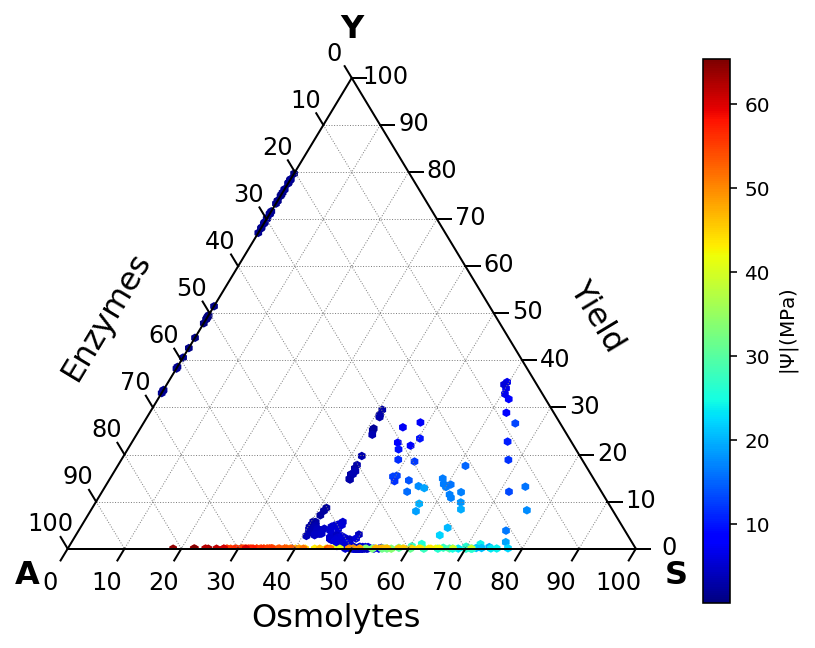

In [17]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,5)


tax.heatmap(community_y6, style="hexagonal", cmap='jet',colorbar=True,cbarlabel='|$\Psi$|(MPa)')
#tax.get_colorbar(orientation='vertical')
#cbar.set_label('Cellulose (mg C cm$^-$$^3$)',size=14)

#tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)

tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",     fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Yield",      fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

#tax.savefig('../figures/ternary_dis_y6.pdf',dpi=500)

tax.show()

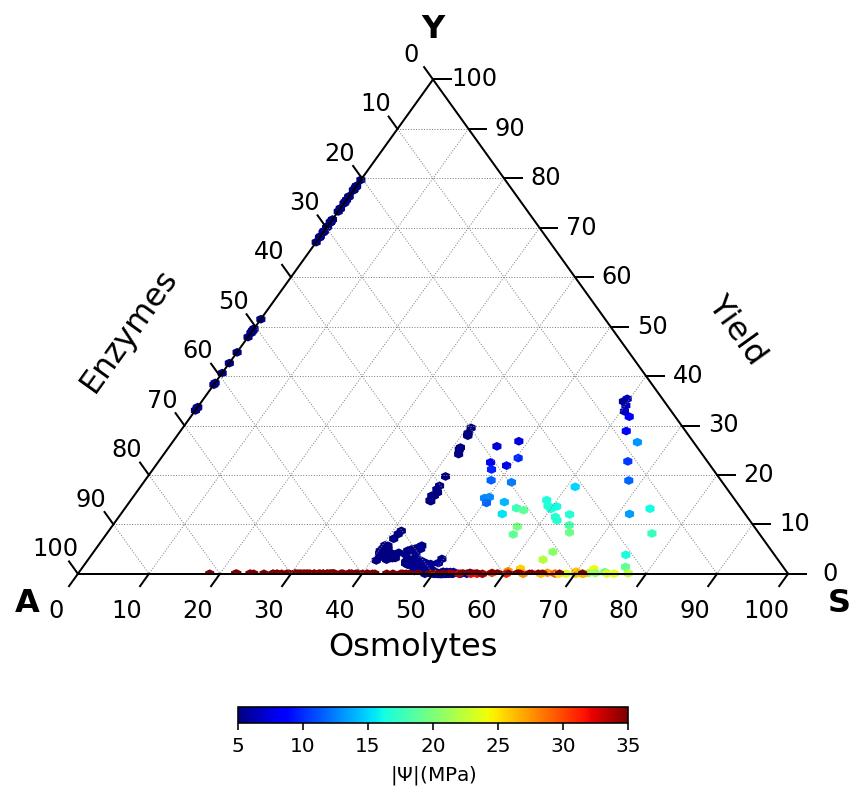

In [82]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,7)

cb_kwargs = {"shrink" : 0.5,
             "orientation" : "horizontal",
             "fraction" : 0.15,
             "pad" : 0.10,
             "aspect" : 25}

tax.heatmap(community_y6,vmin=5.0,vmax=35.0,
            style="hexagonal", cmap='jet',colorbar=True,cbarlabel='|$\Psi$|(MPa)',cb_kwargs=cb_kwargs)
#tax.get_colorbar(orientation='vertical')
#cbar.set_label('Cellulose (mg C cm$^-$$^3$)',size=14)

#tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)

tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",     fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Yield",      fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

#tax.savefig('../figures/ternary_dis_y6.pdf',dpi=500)

tax.show()

## year-9

In [19]:
community_base_y9    = community_base.iloc[365*9-257:365*9-75,:]
community_basex10_y9 = community_basex10.iloc[365*9-257:365*9-75,:]

community_base_y9    = community_base_y9.loc[community_base_y9['Yield']> 0]
community_basex10_y9 = community_basex10_y9.loc[community_basex10_y9['Yield']> 0]

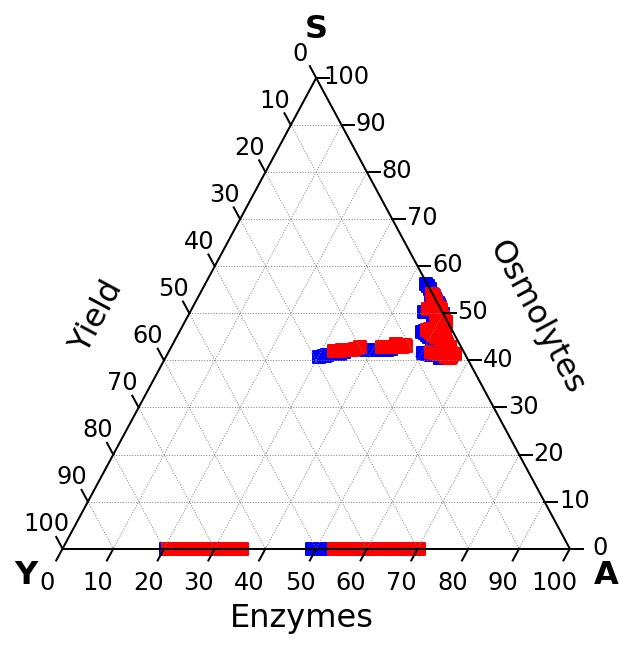

In [15]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)

tax.scatter(community_base_y9.values, marker='s',color='blue', label="Ambient",alpha=1.0)
tax.scatter(community_basex10_y9.values,marker='s',color='red',    label="Severe",alpha=1.0)

#tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)

tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Yield",    fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Osmolytes",fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Enzymes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("A",fontsize=fontsize,weight='heavy')
tax.top_corner_label("S",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("Y", fontsize=fontsize,weight='heavy')

#tax.savefig('../figures/ternary__dis_y9.pdf',dpi=500)

tax.show()

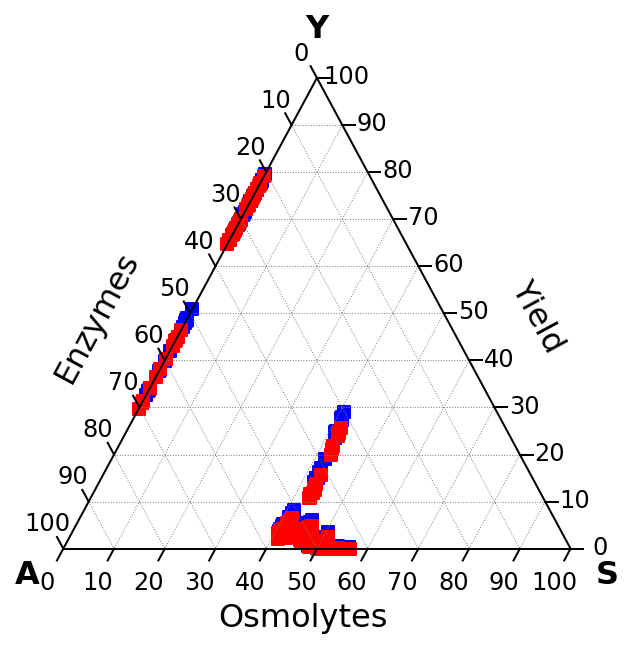

In [20]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)

tax.scatter(community_base_y9.values, marker='s',color='blue', label="Ambient",alpha=1.0)
tax.scatter(community_basex10_y9.values,marker='s',color='red',    label="Severe",alpha=1.0)

#tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)

tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",     fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Yield",      fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

#tax.savefig('../figures/ternary__dis_y9.pdf',dpi=500)

tax.show()

In [21]:
community_base_dis_t = community_base.iloc[365*9-257:365*9-75,:].copy()
community_base_dis_t['Psi'] = abs(base.iloc[365*9-257:365*9-75,:].loc[:,'Psi']).tolist()

community_basex10_dis_t = community_basex10.iloc[365*9-257:365*9-75,:].copy()
community_basex10_dis_t['Psi'] = abs(basex10.iloc[365*9-257:365*9-75,:].loc[:,'Psi']).tolist()

community_year9 = pd.concat([community_base_dis_t, community_basex10_dis_t])

community_year9 = community_year9[community_year9['Yield'] > 0]

community_y9 = dict()
for (i, j, y, p) in community_year9.values:
    community_y9[(i, j)] = p

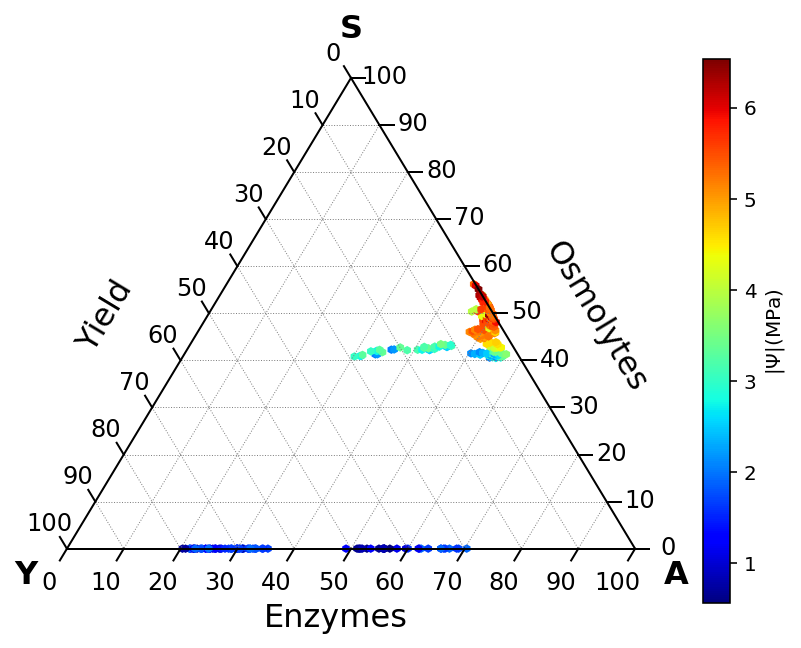

In [17]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,5)


tax.heatmap(community_y9, style="hexagonal", cmap='jet',colorbar=True,cbarlabel='|$\Psi$|(MPa)')


tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Yield",    fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Osmolytes",fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Enzymes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("A",fontsize=fontsize,weight='heavy')
tax.top_corner_label("S",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("Y", fontsize=fontsize,weight='heavy')

#tax.savefig('../figures/ternary_dis_y9.pdf',dpi=500)

tax.show()

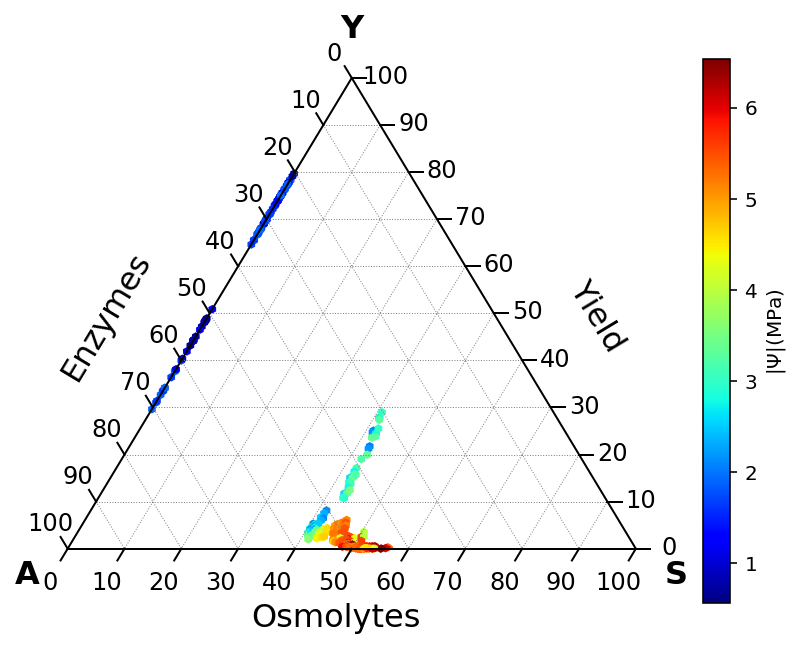

In [27]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,5)


tax.heatmap(community_y9, style="hexagonal", cmap='jet',colorbar=True,cbarlabel='|$\Psi$|(MPa)')


tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
#tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",     fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Yield",      fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

#tax.savefig('../figures/ternary_dis_y9.pdf',dpi=500)

tax.show()

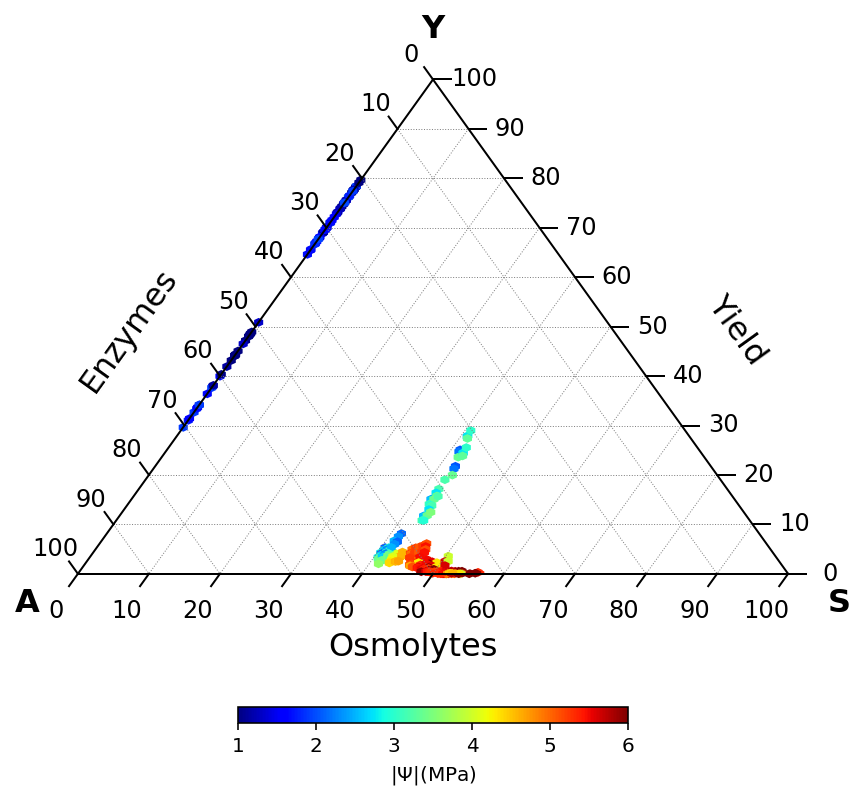

In [76]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,7)


cb_kwargs = {"shrink" : 0.5,
             "orientation" : "horizontal",
             "fraction" : 0.15,
             "pad" : 0.10,
             "aspect" : 25}


tax.heatmap(community_y9, vmin=1.0, vmax=6.0,
            style="hexagonal", cmap='jet',colorbar=True,cbarlabel='|$\Psi$|(MPa)',cb_kwargs=cb_kwargs)

#cb = h.figure.cbar(h.collections[0])
#cb.tick_params(labelsize=20)

tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",     fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Yield",      fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

#tax.savefig('../figures/ternary_dis_y9.pdf',dpi=500)

tax.show()